In [0]:
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

### **Obtendo a base de dados**

In [18]:
!wget https://raw.githubusercontent.com/pierrepita/handson-ml/master/credit_approval_preprocessed.csv -O credit_approval_preprocessed.csv

--2019-11-21 04:10:00--  https://raw.githubusercontent.com/pierrepita/handson-ml/master/credit_approval_preprocessed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106050 (104K) [text/plain]
Saving to: ‘credit_approval_preprocessed.csv’

credit_approval_pre 100%[===================>] 103.56K  --.-KB/s    in 0.04s   

2019-11-21 04:10:00 (2.72 MB/s) - ‘credit_approval_preprocessed.csv’ saved [106050/106050]



### **Lendo a base de dados**

In [0]:
df = pd.read_csv('credit_approval_preprocessed.csv')

In [20]:
df.head()

,age,debt,yearsemployed,creditscore,income,class,gender_a,gender_b,married_l,married_u,married_y,bankcustomer_g,bankcustomer_gg,bankcustomer_p,educationlevel_aa,educationlevel_c,educationlevel_cc,educationlevel_d,educationlevel_e,educationlevel_ff,educationlevel_i,educationlevel_j,educationlevel_k,educationlevel_m,educationlevel_q,educationlevel_r,educationlevel_w,educationlevel_x,ethnicity_bb,ethnicity_dd,ethnicity_ff,ethnicity_h,ethnicity_j,ethnicity_n,ethnicity_o,ethnicity_v,ethnicity_z,priordefault_f,priordefault_t,employed_f,employed_t,driverslicense_f,driverslicense_t,citizen_g,citizen_p,citizen_s
0,30.83,0.000000,0.043860,0.014925,0.00000,+,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0
1,58.67,0.159286,0.106667,0.089552,0.00560,+,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0
2,24.50,0.017857,0.052632,0.000000,0.00824,+,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0
3,27.83,0.055000,0.131579,0.074627,0.00003,+,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0
4,20.17,0.200893,0.060000,0.000000,0.00000,+,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1


### **Preparando base de dados para submissão aos modelos**

In [0]:
target_columns = ['class']
data_columns = list(set(df.columns) - set(target_columns))

X_train, X_test, y_train, y_test = train_test_split(df[data_columns], df[target_columns], test_size=0.33, random_state=42)

### **ARVORE DE DECISAO**

In [0]:
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=20)
clf = clf.fit(X_train, y_train)

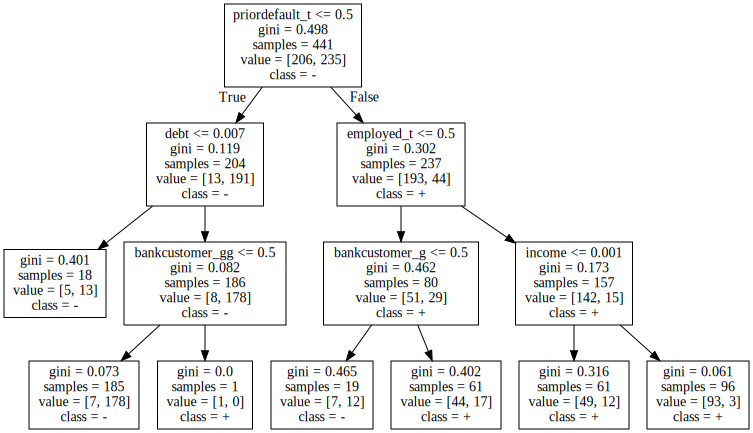

In [26]:
dot_data = tree.export_graphviz(clf, feature_names=data_columns, class_names=['+', '-'], precision=3,  label='all')  
graph = graphviz.Source(dot_data)  
graph 

### **NAIVE BAYES**

In [29]:
gnb = GaussianNB()
gnb_y_pred = gnb.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## **GRADIENT BOOSTED TREES**

In [35]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.05, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## **XGBOOST**

In [67]:
xgb_clf = XGBClassifier(max_depth=4, learning_rate=0.1)
xgb_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## **RANDOM FOREST**

In [73]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## **REGRESSÃO LOGÍSTICA**

In [78]:
lr_clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
lr_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### **Avaliando os modelos**

In [0]:
dt_results = clf.predict(X_test)
nb_results = gnb_y_pred.predict(X_test)
gbt_results = gb_clf.predict(X_test)
xgb_results = xgb_clf.predict(X_test)
rf_results = rf_clf.predict(X_test)
lr_results = lr_clf.predict(X_test)

In [44]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_results))

print("Classification Report")
print(classification_report(y_test, dt_results))

Confusion Matrix:
[[ 83   9]
 [ 23 103]]
Classification Report
              precision    recall  f1-score   support

           +       0.78      0.90      0.84        92
           -       0.92      0.82      0.87       126

    accuracy                           0.85       218
   macro avg       0.85      0.86      0.85       218
weighted avg       0.86      0.85      0.85       218



In [45]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, nb_results))

print("Classification Report")
print(classification_report(y_test, nb_results))

Confusion Matrix:
[[ 39  53]
 [  5 121]]
Classification Report
              precision    recall  f1-score   support

           +       0.89      0.42      0.57        92
           -       0.70      0.96      0.81       126

    accuracy                           0.73       218
   macro avg       0.79      0.69      0.69       218
weighted avg       0.78      0.73      0.71       218



In [46]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, gbt_results))

print("Classification Report")
print(classification_report(y_test, gbt_results))

Confusion Matrix:
[[ 63  29]
 [  7 119]]
Classification Report
              precision    recall  f1-score   support

           +       0.90      0.68      0.78        92
           -       0.80      0.94      0.87       126

    accuracy                           0.83       218
   macro avg       0.85      0.81      0.82       218
weighted avg       0.84      0.83      0.83       218



In [69]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_results))

print("Classification Report")
print(classification_report(y_test, xgb_results))

Confusion Matrix:
[[ 84   8]
 [ 21 105]]
Classification Report
              precision    recall  f1-score   support

           +       0.80      0.91      0.85        92
           -       0.93      0.83      0.88       126

    accuracy                           0.87       218
   macro avg       0.86      0.87      0.87       218
weighted avg       0.87      0.87      0.87       218



In [75]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_results))

print("Classification Report")
print(classification_report(y_test, rf_results))

Confusion Matrix:
[[ 79  13]
 [ 20 106]]
Classification Report
              precision    recall  f1-score   support

           +       0.80      0.86      0.83        92
           -       0.89      0.84      0.87       126

    accuracy                           0.85       218
   macro avg       0.84      0.85      0.85       218
weighted avg       0.85      0.85      0.85       218



In [80]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_results))

print("Classification Report")
print(classification_report(y_test, lr_results))

Confusion Matrix:
[[ 87   5]
 [ 26 100]]
Classification Report
              precision    recall  f1-score   support

           +       0.77      0.95      0.85        92
           -       0.95      0.79      0.87       126

    accuracy                           0.86       218
   macro avg       0.86      0.87      0.86       218
weighted avg       0.88      0.86      0.86       218



## **E aí, o que achou de sua acurácia agora? Qual modelo você escolheria?** 


![alt text](https://www.mememaker.net/api/bucket?path=static/img/memes/full/2017/May/1/7/give-that-man-a-data-science-degree.jpg)